# Analyzing Historical Stock/Revenue Data and Building a Dashboard

In [ ]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 20.4 MB/s eta 0:00:00


**Tesla Stock Data Using yfinance**

In [ ]:
import yfinance as yf

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
history = tesla.history(period="max")

# Reset index and keep only the Date column
history.reset_index(inplace=True)

# Display the first five rows of the dataframe
history.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.27,1.67,1.17,1.59,281494500,0.00,0.00
1,2010-06-30 00:00:00-04:00,1.72,2.03,1.55,1.59,257806500,0.00,0.00
2,2010-07-01 00:00:00-04:00,1.67,1.73,1.35,1.46,123282000,0.00,0.00
3,2010-07-02 00:00:00-04:00,1.53,1.54,1.25,1.28,77097000,0.00,0.00
4,2010-07-06 00:00:00-04:00,1.33,1.33,1.06,1.07,103003500,0.00,0.00


**Webscraping to Extract Tesla Revenue Data**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# send a request to the website
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_content = requests.get(url).text

# parse the html content
soup = BeautifulSoup(html_content, "html.parser")

# find the table containing the data
table = soup.find("table", {"class": "historical_data_table"})

# create lists to store the data
dates = []
revenues = []

# loop through each row of the table and append the data to the lists
for row in table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 0:
        continue
    dates.append(cols[0].text.strip())
    revenues.append(cols[1].text.replace("$", "").replace(",", "").strip())

# create a dataframe from the data
tesla_revenue = pd.DataFrame({"Date": dates, "Revenue": revenues})

# display the last five rows of the dataframe
print(tesla_revenue.tail())

    Date Revenue
9   2013    2013
10  2012     413
11  2011     204
12  2010     117
13  2009     112


**Extract Stock Data GME**

In [ ]:
import yfinance as yf

# Use yfinance to extract GME data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset the index and display the first five rows
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.62,1.69,1.60,1.69,76216000,0.00,0.00
1,2002-02-14 00:00:00-05:00,1.71,1.72,1.67,1.68,11021600,0.00,0.00
2,2002-02-15 00:00:00-05:00,1.68,1.69,1.66,1.67,8389600,0.00,0.00
3,2002-02-19 00:00:00-05:00,1.67,1.67,1.58,1.61,7410400,0.00,0.00
4,2002-02-20 00:00:00-05:00,1.62,1.66,1.60,1.66,6892800,0.00,0.00


**Webscraping to Extract Tesla Revenue Data**

In [72]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# send a request to the website
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_content = requests.get(url).text

# parse the html content
soup = BeautifulSoup(html_content, "html.parser")

# find the table containing the data
table = soup.find("table", {"class": "historical_data_table"})

# create lists to store the data
dates = []
revenues = []

# loop through each row of the table and append the data to the lists
for row in table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 0:
        continue
    dates.append(cols[0].text.strip())
    revenues.append(cols[1].text.replace("$", "").replace(",", "").strip())

# create a dataframe from the data
gme_revenue = pd.DataFrame({"Date": dates, "Revenue": revenues})

# convert the date column to datetime format
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

# sort the data by date
gme_revenue.sort_values("Date", inplace=True)

# display the last five rows of the dataframe
print(gme_revenue.tail())


        Date Revenue
4 2019-01-01    8285
3 2020-01-01    6466
2 2021-01-01    5090
1 2022-01-01    6011
0 2023-01-01    5927


**Tesla Stock Graph**

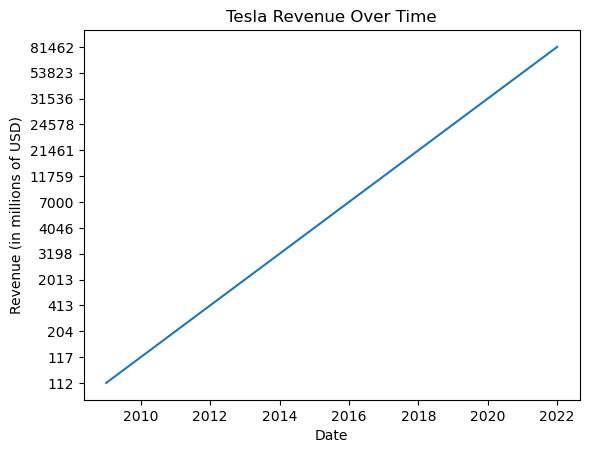

In [74]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# send a request to the website
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_content = requests.get(url).text

# parse the html content
soup = BeautifulSoup(html_content, "html.parser")

# find the table containing the data
table = soup.find("table", {"class": "historical_data_table"})

# create lists to store the data
dates = []
revenues = []

# loop through each row of the table and append the data to the lists
for row in table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 0:
        continue
    dates.append(cols[0].text.strip())
    revenues.append(cols[1].text.replace("$", "").replace(",", "").strip())

# create a dataframe from the data
tesla_revenue = pd.DataFrame({"Date": dates, "Revenue": revenues})

# convert the date column to datetime format
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# sort the data by date
tesla_revenue.sort_values("Date", inplace=True)

# plot the data
plt.plot(tesla_revenue["Date"], tesla_revenue["Revenue"])
plt.title("Tesla Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (in millions of USD)")
plt.show()


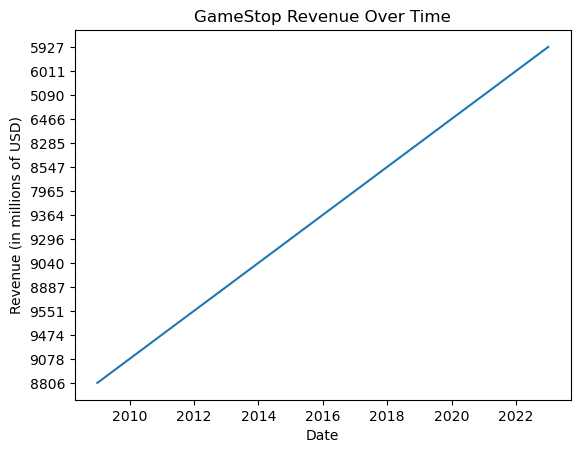

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# send a request to the website
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_content = requests.get(url).text

# parse the html content
soup = BeautifulSoup(html_content, "html.parser")

# find the table containing the data
table = soup.find("table", {"class": "historical_data_table"})

# create lists to store the data
dates = []
revenues = []

# loop through each row of the table and append the data to the lists
for row in table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 0:
        continue
    dates.append(cols[0].text.strip())
    revenues.append(cols[1].text.replace("$", "").replace(",", "").strip())

# create a dataframe from the data
gme_revenue = pd.DataFrame({"Date": dates, "Revenue": revenues})

# convert the date column to datetime format
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

# sort the data by date
gme_revenue.sort_values("Date", inplace=True)

# plot the data
plt.plot(gme_revenue["Date"], gme_revenue["Revenue"])
plt.title("GameStop Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (in millions of USD)")
plt.show()
